# Clustering o agrupamiento (I)

In [3]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 120

## Dataset artificial

*Crearemos un dataset artificial para entender el concepto*

In [8]:
# Crear dataset artificial
from sklearn.datasets import make_blobs
#semilla de los aleatorios
np.random.seed(1235)
#generar los datos
X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True)
#n_samples: numero de muestras
#n_features: caracteristicas o dimensiones
#centers: centroides alrededor de los cuales se crean los datos
#cluster_std: desviacion estandar
#shuffle: si el orden de la lista de datos es aleatoria o no

<function matplotlib.pyplot.show(*args, **kw)>

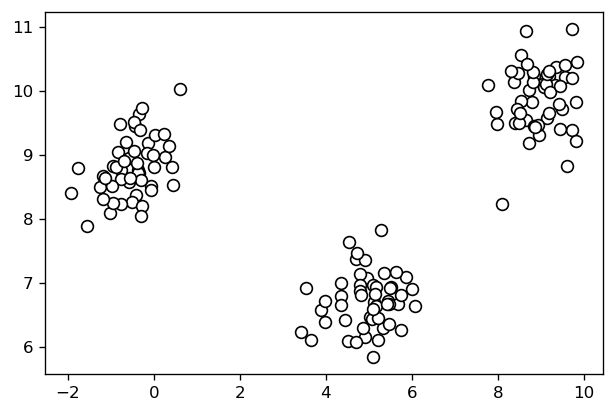

In [9]:
# Graficación
plt.scatter(X[:,0],X[:,1],c='white',edgecolor='black',s=50)
plt.show


## Agrupamiento por K-Means

In [11]:
# Importar librería
from sklearn.cluster import KMeans

# Instanciar el modelo
km= KMeans(n_clusters=4,init='random',n_init=10,max_iter=300,tol=1e-04)

#n_cluster: numero de clusteres
#init:metodo de localizacion inicial de los centroides
#n_init: numero de veces que reinicia el algoritmo
#max_iter: numero maximo de iteraciones
#tol:toleracia a la inercia
# Predicción de los clústeres
y_km = km.fit_predict(X)

In [13]:
# Centroides de los clústeres 
km.cluster_centers_

array([[ 4.09874984,  6.50032145],
       [-0.5070683 ,  8.81410797],
       [ 8.96922495,  9.89298344],
       [ 5.23406392,  6.79697968]])

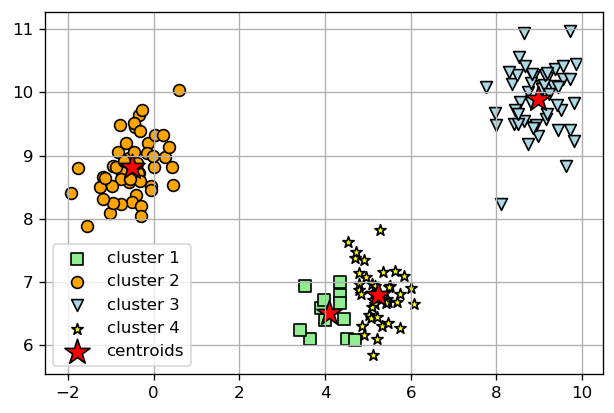

In [15]:
# Graficación 
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black',label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='yellow', marker='*', edgecolor='black',label='cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [16]:
# Distorsión, dismilitud o inercia
km.inertia_

66.68450655996278

<function matplotlib.pyplot.show(*args, **kw)>

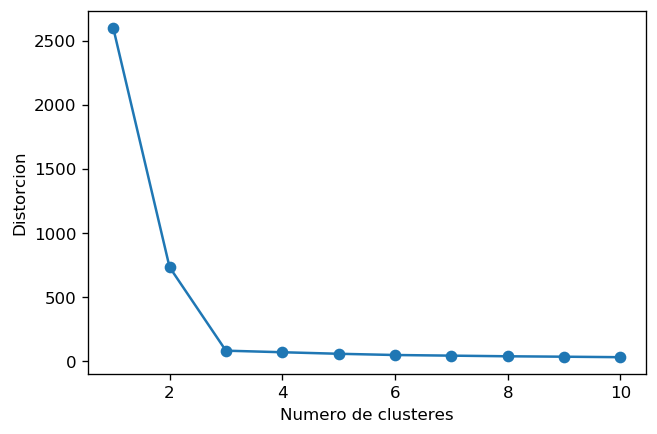

In [17]:
# Determinación del método del codo (elbow) para determinar el número de clústeres
distorciones = []
for i in range(1,11):
    kms = KMeans(n_clusters = i,init = 'k-means++',n_init=10,max_iter=300)
    kms.fit(X)
    distorciones.append(kms.inertia_)

# Graficar
plt.plot(range(1,11),distorciones,marker='o')
plt.xlabel('Numero de clusteres')
plt.ylabel('Distorcion')
plt.show

## Agrupamiento por DBSCAN
### *Density-based Spatial Clustering of Applications with Noise* 

In [18]:
# Importar librería
from sklearn.cluster import DBSCAN

# Instanciar el modelo
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')

#eps:radio
#min_samples:MinPts
#metric: metrica de distancia

# Predecir los clústeres
y_db = db.fit_predict(X)


In [19]:
# Imprimir el número estimado de clústeres
etiquetas=db.labels_
n_clusters=len(set(etiquetas))-(1 if -1 in etiquetas else 0)
print('Numero de clusters: ',n_clusters)

Numero de clusters:  7


In [20]:
# Imprimir el número de puntos ruido
n_noise = list(etiquetas).count(-1) 
print("Numero de puntos ruido: ",n_noise)

Numero de puntos ruido:  110


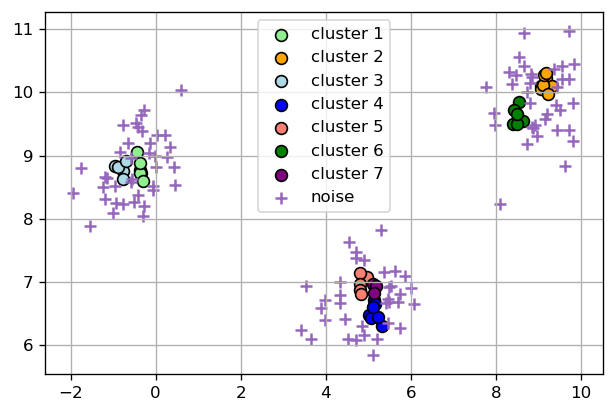

In [21]:
# Graficar
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s=50, c='lightgreen', marker='o', edgecolor='black',label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], s=50, c='lightblue', marker='o', edgecolor='black',label='cluster 3')
plt.scatter(X[y_db == 3, 0], X[y_db == 3, 1], s=50, c='blue', marker='o', edgecolor='black',label='cluster 4')
plt.scatter(X[y_db == 4, 0], X[y_db == 4, 1], s=50, c='#FA8072', marker='o', edgecolor='black', label='cluster 5')
plt.scatter(X[y_db == 5, 0], X[y_db == 5, 1], s=50, c='green', marker='o', edgecolor='black',label='cluster 6')
plt.scatter(X[y_db == 6, 0], X[y_db == 6, 1], s=50, c='purple', marker='o', edgecolor='black',label='cluster 7')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], s=50, c='#9467bd', marker='+', edgecolor='black',label='noise')
plt.legend(scatterpoints=1, loc = 0)
plt.grid()
plt.show()